In [1]:
# Load data from another R file
source('data.generator.R')

In [2]:
# Leave this for now... This is intended to simulate random effects, or
# effects by variables that you do not have.  Increasing this value will
# introduce more noise to the data, and make modeling more difficult.
NOISE <- 0.2 


train <- generate.data(1000, NOISE)
head(train)

y,age,sex,weight,height,mins.exercise,g.carb,g.fat,g.protein,day.of.year,hours.sleep,cortisol
228246.9,32.98672,m,161.8254,157.1198,10.51543,1285.192,842.3772,989.9774,243,47.03898,500
184601.0,36.93083,m,148.1206,191.5348,15.05199,1150.384,692.9176,1131.2964,176,48.62198,200
497881.2,33.92038,f,133.1270,117.2588,20.97782,1590.295,900.6650,871.2637,217,51.00843,300
345921.9,37.11530,m,149.1959,135.1131,12.29155,1255.021,673.7318,1044.0036,323,49.33666,200
377985.6,40.42364,f,129.2887,108.3697,41.16883,1555.975,682.4032,1082.1606,77,48.67346,300
229250.4,38.19943,f,128.6948,112.0075,23.75127,1591.649,590.0450,1261.5072,113,49.33183,400


In [3]:
base.model <- lm(y ~ ., train)
summary(base.model)


Call:
lm(formula = y ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-193741  -41500    -702   44040  180006 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   806527.492  79123.055  10.193  < 2e-16 ***
age              307.623    390.387   0.788   0.4309    
sexm            5509.673  10310.418   0.534   0.5932    
weight         -1994.848    370.449  -5.385 9.06e-08 ***
height         -1173.765    128.667  -9.122  < 2e-16 ***
mins.exercise    -86.176    110.063  -0.783   0.4338    
g.carb             2.773     11.322   0.245   0.8066    
g.fat             -4.765     20.949  -0.227   0.8201    
g.protein       -178.265     13.270 -13.434  < 2e-16 ***
day.of.year       26.531     19.119   1.388   0.1655    
hours.sleep     1958.120   1007.207   1.944   0.0522 .  
cortisol          21.490     10.072   2.134   0.0331 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63900 on 988 deg

In [4]:
# trace=0 just supresses the output, omit to see what it does
reduced <- step(base.model, trace=0)
summary(reduced)


Call:
lm(formula = y ~ weight + height + g.protein + day.of.year + 
    hours.sleep + cortisol, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-192352  -41369    -878   43683  182732 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 792426.00   58621.67  13.518  < 2e-16 ***
weight       -1870.91     250.59  -7.466  1.8e-13 ***
height       -1126.18     105.06 -10.719  < 2e-16 ***
g.protein     -178.36      13.24 -13.472  < 2e-16 ***
day.of.year     27.23      19.00   1.433   0.1520    
hours.sleep   1985.11    1004.03   1.977   0.0483 *  
cortisol        21.69      10.03   2.162   0.0308 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63790 on 993 degrees of freedom
Multiple R-squared:  0.4265,	Adjusted R-squared:  0.423 
F-statistic: 123.1 on 6 and 993 DF,  p-value: < 2.2e-16


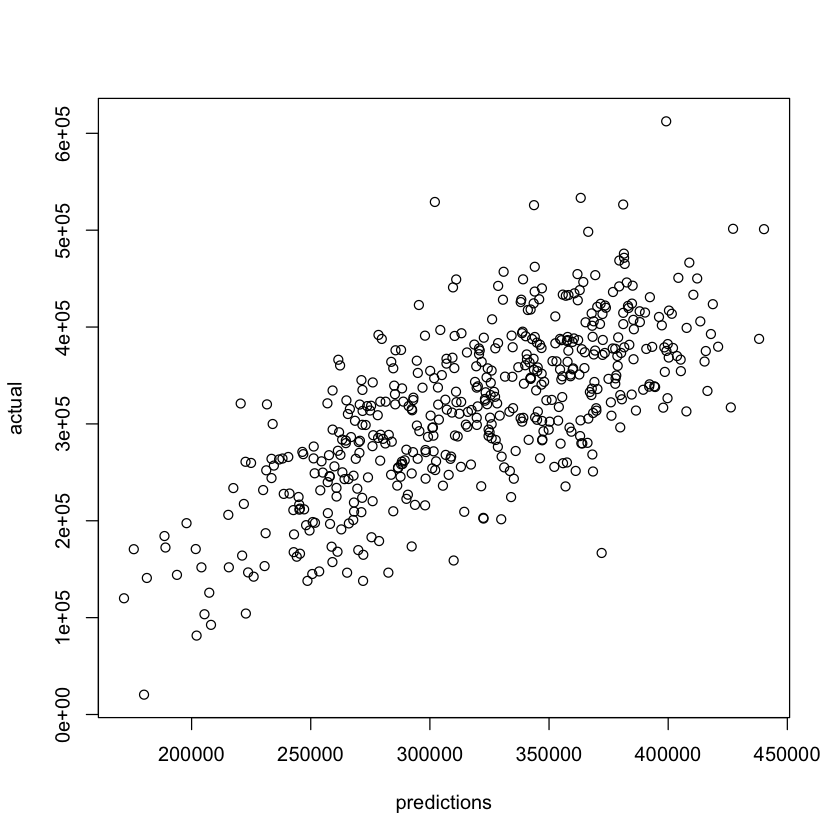

In [5]:
# How well does this model predict new data?
# generate 500 new rows according to the same "process"
test <- generate.data(500, NOISE) 
predictions <- predict(reduced, newdata=test)
actual <- test$y
plot(predictions, actual)

Visually, it looks reasonable, and we can use Adj. Rsq. to compare models, but another common metric is the sum of squared errors (SSE), or the root mean squared error (RMSE) which is "how much error does the average point have?".  These two metrics are more or less the same in terms of which models they will prefer, so you can use either one to the same effect, just whichever you prefer... One (SSE) is slightly faster to compute, the other (RMSE) is slightly more intuitive.

**NOTE:** Unlike Rsq/Adj. Rsq, you want to _minimize_ SSE and RMSE

In [6]:
sse <- function(predictions, actual) {
    sum((predictions - actual)^2)
}

rmse <- function(predictions, actual) {
    sqrt(mean((predictions - actual)^2))
}

In [7]:
sse(predictions, actual)
rmse(predictions, actual)

[1] 1.754521e+12

[1] 59237.16

So, the average point has an error of 55,885.  Is that good or bad? Let's look at the y values to determine:

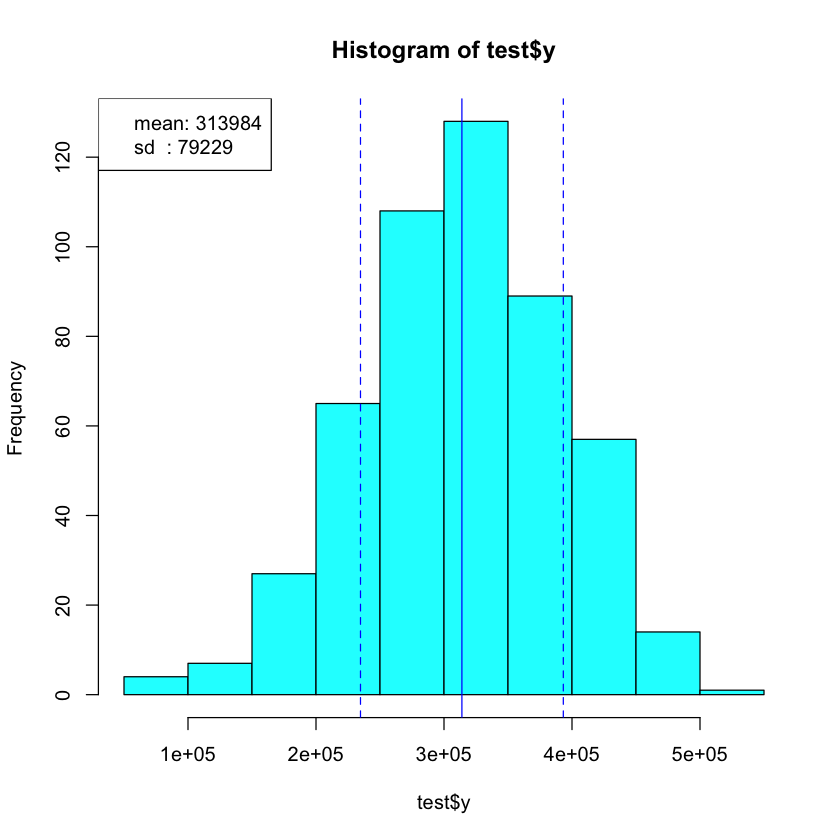

In [8]:
mu <- mean(test$y)
sig <- sd(test$y)
hist(test$y, col=5)
legend('topleft', legend=c(sprintf('mean: %.0f', mu), 
                           sprintf('sd  : %.0f', sig )))
abline(v=mu, col=4)
abline(v=mu+c(-1, 1)*sig, col=4, lty=2)

So our RMSE is < 1SD of our data, which is a good baseline, but I'll bet you can do better...

In [8]:
head(train)

y,age,sex,weight,height,mins.exercise,g.carb,g.fat,g.protein,day.of.year,hours.sleep,cortisol
228246.9,32.98672,m,161.8254,157.1198,10.51543,1285.192,842.3772,989.9774,243,47.03898,500
184601.0,36.93083,m,148.1206,191.5348,15.05199,1150.384,692.9176,1131.2964,176,48.62198,200
497881.2,33.92038,f,133.1270,117.2588,20.97782,1590.295,900.6650,871.2637,217,51.00843,300
345921.9,37.11530,m,149.1959,135.1131,12.29155,1255.021,673.7318,1044.0036,323,49.33666,200
377985.6,40.42364,f,129.2887,108.3697,41.16883,1555.975,682.4032,1082.1606,77,48.67346,300
229250.4,38.19943,f,128.6948,112.0075,23.75127,1591.649,590.0450,1261.5072,113,49.33183,400


In [11]:
too.big <- lm(y ~ age + I(day.of.year^2) + I(day.of.year^3) + I(day.of.year^4) + I(day.of.year^5) + I(day.of.year^6) + I(day.of.year^8) + I(day.of.year^7) + log(age) + sex + weight + log(weight) + I(weight^2) + height + I(height^2)+
              mins.exercise + g.carb + g.fat + g.protein + day.of.year + hours.sleep + cortisol + I(hours.sleep^2), 
              data=train) 
summary(too.big)


Call:
lm(formula = y ~ age + I(day.of.year^2) + I(day.of.year^3) + 
    I(day.of.year^4) + I(day.of.year^5) + I(day.of.year^6) + 
    I(day.of.year^8) + I(day.of.year^7) + log(age) + sex + weight + 
    log(weight) + I(weight^2) + height + I(height^2) + mins.exercise + 
    g.carb + g.fat + g.protein + day.of.year + hours.sleep + 
    cortisol + I(hours.sleep^2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-171341  -42214    -788   43853  174503 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.245e+07  5.944e+07  -0.378  0.70568    
age               2.975e+03  3.421e+03   0.870  0.38468    
I(day.of.year^2)  1.633e+02  9.855e+01   1.657  0.09778 .  
I(day.of.year^3) -2.990e+00  1.794e+00  -1.667  0.09593 .  
I(day.of.year^4)  2.849e-02  1.737e-02   1.641  0.10117    
I(day.of.year^5) -1.537e-04  9.525e-05  -1.613  0.10698    
I(day.of.year^6)  4.726e-07  2.968e-07   1.592  0.11167    
I(day.of.year^8)  5.191e-13  3